Dataset with students data extracted from Unir archive.
Geodataframes extracted from the openlibraries https://datosabiertos.esri.co/ and https://sites.google.com/site/seriescol/shapes

In [93]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Default plot size is set.
plt.rcParams['figure.figsize'] = [15, 15]

# Geodataframe and dataset are loaded.
mun= gpd.read_file('mpio.shp')
ds = pd.read_csv('dataset.csv')

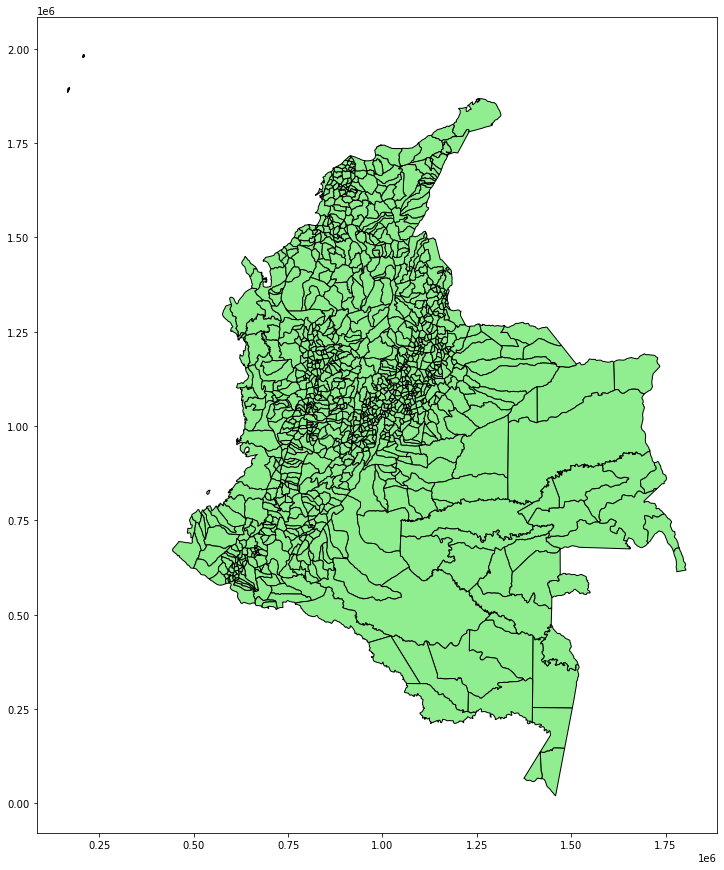

In [103]:
# Firstly, we plot the municipalities in the Country.
fig, ax = plt.subplots()
mun.plot(color='lightgreen', edgecolor='black', ax=ax)

plt.show()

In [96]:
# Frequency of studies along the municipalities is checked.
freq = ds['NOMBRE_MPI'].value_counts()     # Series object of dataset frequency.
print(freq)

PASTO                       13224
IPIALES                      1251
TUMACO                        607
TUQUERRES                     604
BOGOTÁ                        449
                            ...  
SAN JUAN NEPOMUCENO             1
COELLO                          1
MANAURE BALCON DEL CESAR        1
MUZO                            1
AGUACHICA                       1
Name: NOMBRE_MPI, Length: 358, dtype: int64


In [98]:
freq = freq.to_frame()                     # Convert series to dataframe.
freq = freq.rename({'NOMBRE_MPI': 'Frequency'}, axis='columns')
freq['NOMBRE_MPI'] = freq.index

In [99]:
munfrec= mun.merge(freq, on='NOMBRE_MPI')  # Merge frequencies with geodataframe.

munfrec.to_file('prueba3.shp')

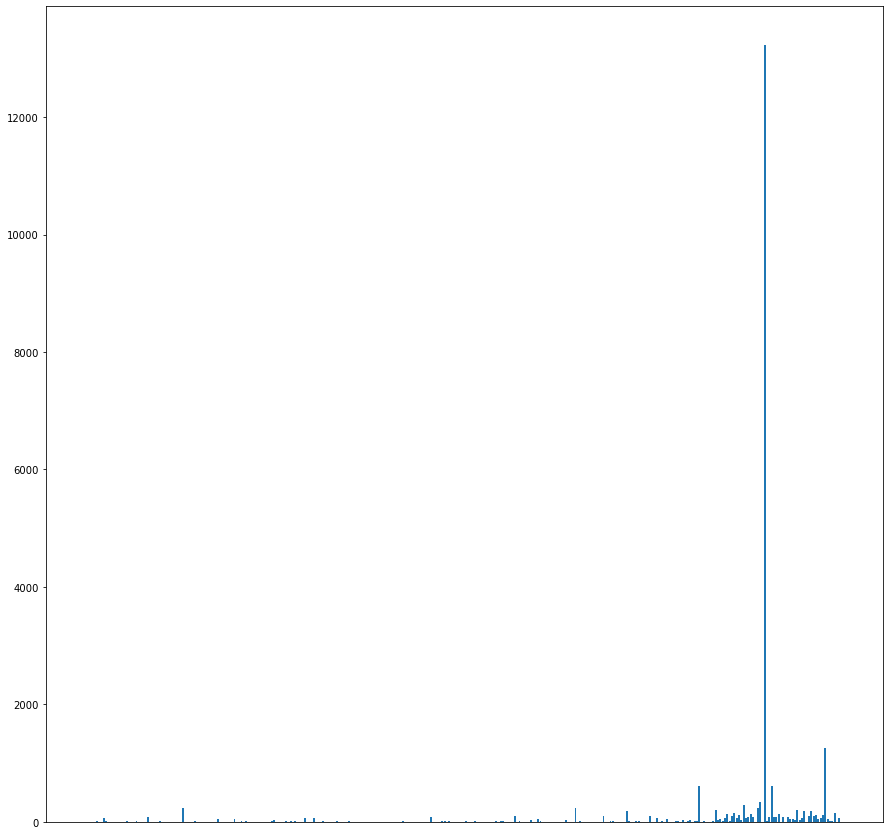

In [104]:
plt.bar(munfrec['NOMBRE_MPI'], munfrec['Frequency'])
plt.tick_params(bottom=False, labelbottom=False)
plt.show()

After plotting the frequencies, it is very relevant how the studies are mainly focused in the municipality of Pasto.  
Following this municipality, Ipiales and Tumaco are far away from this range.

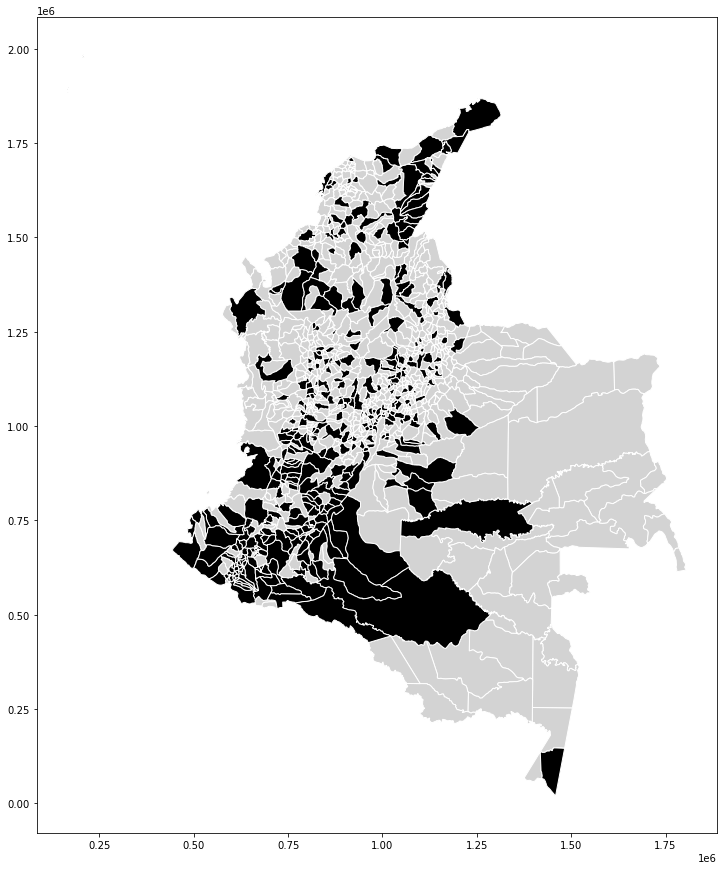

In [105]:
# We plot the municipalities that appear in the dataset.
fig, ax = plt.subplots()
mun.plot(color='lightgrey', edgecolor='white', ax=ax)
munfrec.plot(color='black', edgecolor='white', ax=ax)
plt.show()

The dataset contains cases of students located in the black municipalities, while the light ones are not analysed.

In [74]:
# Due to the frequency differente, we make a threshold in the dataset.
munfrec_reduced=munfrec.loc[munfrec['Frequency'] < 600]
munfrec_reduced=munfrec_reduced.loc[munfrec_reduced['Frequency'] > 5]

pasto=munfrec.loc[munfrec['NOMBRE_MPI'] == 'PASTO' ]
ipiales=munfrec.loc[munfrec['NOMBRE_MPI'] == 'IPIALES']
tumaco=munfrec.loc[munfrec['NOMBRE_MPI'] == 'TUMACO']
tuquerres=munfrec.loc[munfrec['NOMBRE_MPI'] == 'TUQUERRES']

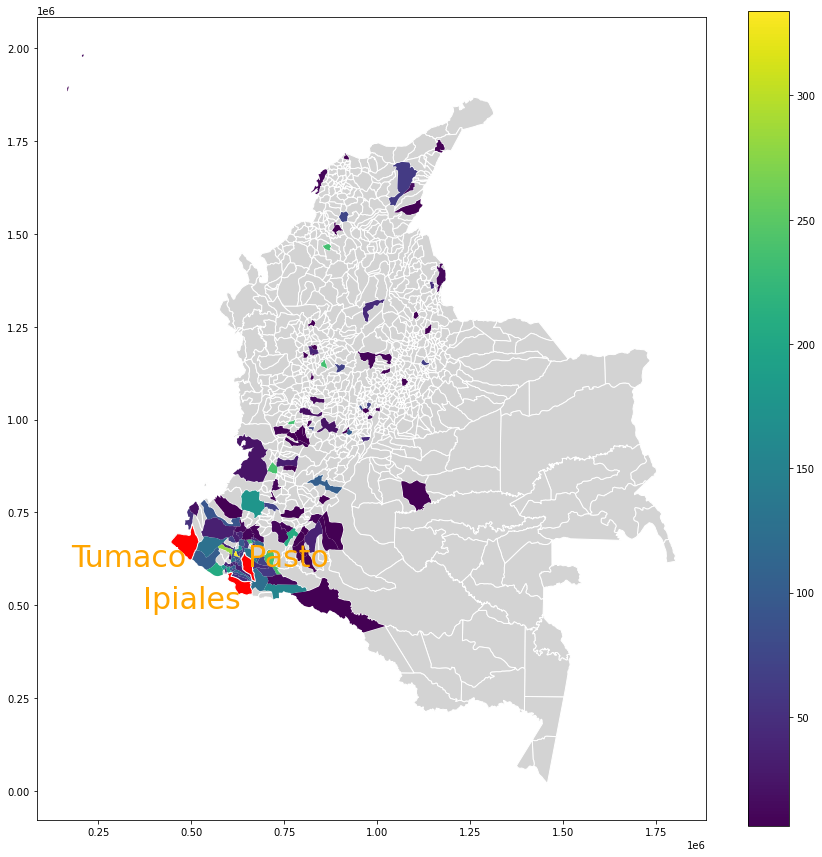

In [91]:
fig, ax = plt.subplots()
mun.plot(color='lightgrey', edgecolor='white', ax=ax)
munfrec_reduced.plot(column='Frequency', legend=True, ax=ax)

pasto.plot(color='red', edgecolor='white', ax=ax)
plt.annotate(text="Pasto",color='orange',size=30, xy=[pasto.geometry.centroid.x,pasto.geometry.centroid.y],
            horizontalalignment='left', verticalalignment='baseline')

ipiales.plot(color='red', edgecolor='white', ax=ax)
plt.annotate(text="Ipiales",color='orange',size=30, xy=[ipiales.geometry.centroid.x,ipiales.geometry.centroid.y],
            horizontalalignment='right', verticalalignment='top')

tumaco.plot(color='red', edgecolor='white', ax=ax)
plt.annotate(text="Tumaco",color='orange',size=30, xy=[tumaco.geometry.centroid.x,tumaco.geometry.centroid.y],
            horizontalalignment='right', verticalalignment='top')

plt.show()

Besides Pasto, Tumaco and Ipiales, it is significant that most of the cases are close to Ecuador's frontier. 